# Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data.csv')

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Analysis

In [5]:
df.drop('customerID', axis = 1, inplace = True)

In [6]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
' ' in df.TotalCharges.unique()

True

In [9]:
df.columns = [col.lower() for col in df.columns]

In [10]:
df[df.totalcharges == ' '].shape

(11, 20)

In [11]:
df = df[df.totalcharges != ' ']

In [14]:
df.totalcharges = df.totalcharges.astype(float)

In [15]:
df.churn.value_counts()

No     5163
Yes    1869
Name: churn, dtype: int64

# Visualization

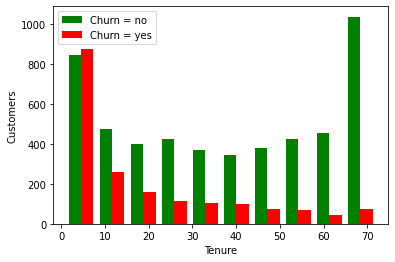

In [22]:
plt.hist([
    df[df.churn == 'No'].tenure,
    df[df.churn == 'Yes'].tenure
], color = ['green', 'red'], label = ['Churn = no', 'Churn = yes'])

plt.xlabel('Tenure')
plt.ylabel('Customers')
plt.legend()
plt.show()

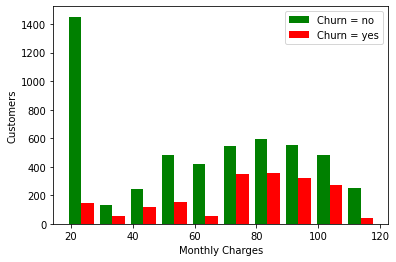

In [23]:
plt.hist([
    df[df.churn == 'No'].monthlycharges,
    df[df.churn == 'Yes'].monthlycharges
], color = ['green', 'red'], label = ['Churn = no', 'Churn = yes'])

plt.xlabel('Monthly Charges')
plt.ylabel('Customers')
plt.legend()
plt.show()

# Cleaning

In [40]:
def df_cat_values(df):
    df_cat = df.select_dtypes(include = 'object')
    for col in df_cat:
        print(f'{col}: {df_cat[col].unique()}')

In [41]:
df_cat_values(df)

gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['No' 'Yes']
phoneservice: ['No' 'Yes']
multiplelines: ['No phone service' 'No' 'Yes']
internetservice: ['DSL' 'Fiber optic' 'No']
onlinesecurity: ['No' 'Yes' 'No internet service']
onlinebackup: ['Yes' 'No' 'No internet service']
deviceprotection: ['No' 'Yes' 'No internet service']
techsupport: ['No' 'Yes' 'No internet service']
streamingtv: ['No' 'Yes' 'No internet service']
streamingmovies: ['No' 'Yes' 'No internet service']
contract: ['Month-to-month' 'One year' 'Two year']
paperlessbilling: ['Yes' 'No']
paymentmethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
churn: ['No' 'Yes']


In [42]:
df.replace('No internet service', 'No', inplace = True)
df.replace('No phone service', 'No', inplace = True)

In [43]:
df_cat_values(df)

gender: ['Female' 'Male']
partner: ['Yes' 'No']
dependents: ['No' 'Yes']
phoneservice: ['No' 'Yes']
multiplelines: ['No' 'Yes']
internetservice: ['DSL' 'Fiber optic' 'No']
onlinesecurity: ['No' 'Yes']
onlinebackup: ['Yes' 'No']
deviceprotection: ['No' 'Yes']
techsupport: ['No' 'Yes']
streamingtv: ['No' 'Yes']
streamingmovies: ['No' 'Yes']
contract: ['Month-to-month' 'One year' 'Two year']
paperlessbilling: ['Yes' 'No']
paymentmethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
churn: ['No' 'Yes']


In [47]:
for col in df.columns:
    if df[col].unique().tolist() in [['Yes', 'No'], ['No', 'Yes']]:
        df[col].replace({'Yes': 1, 'No': 0}, inplace = True)

In [48]:
df_cat_values(df)

gender: ['Female' 'Male']
internetservice: ['DSL' 'Fiber optic' 'No']
contract: ['Month-to-month' 'One year' 'Two year']
paymentmethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [49]:
df['gender'].replace({'Female': 1, 'Male': 0}, inplace = True)

In [50]:
df_cat_values(df)

internetservice: ['DSL' 'Fiber optic' 'No']
contract: ['Month-to-month' 'One year' 'Two year']
paymentmethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [59]:
df = pd.get_dummies(df, columns=['internetservice', 'contract', 'paymentmethod'])

In [60]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'onlinesecurity', 'onlinebackup',
       'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies',
       'paperlessbilling', 'monthlycharges', 'totalcharges', 'churn',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'contract_Month-to-month', 'contract_One year',
       'contract_Two year', 'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
       'paymentmethod_Electronic check', 'paymentmethod_Mailed check'],
      dtype='object')

In [61]:
df_cat_values(df)

# Scaling

In [62]:
cols_to_scale = ['tenure', 'monthlycharges', 'totalcharges']

In [63]:
from sklearn.preprocessing import MinMaxScaler

In [66]:
scaler = MinMaxScaler()

In [67]:
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [69]:
df[cols_to_scale].head()

,tenure,monthlycharges,totalcharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


# Splitting

In [76]:
x = df.drop('churn', axis = 1)

In [77]:
x.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,onlinesecurity,onlinebackup,deviceprotection,...,internetservice_DSL,internetservice_Fiber optic,internetservice_No,contract_Month-to-month,contract_One year,contract_Two year,paymentmethod_Bank transfer (automatic),paymentmethod_Credit card (automatic),paymentmethod_Electronic check,paymentmethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [74]:
y = df['churn']

In [75]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2, random_state=5
)

In [80]:
x_train.shape, x_test.shape

((5625, 26), (1407, 26))

# Training

In [81]:
import keras

In [90]:
model = keras.Sequential([
    keras.layers.Dense(
        units = 26, activation = 'relu', kernel_initializer = 'he_uniform'
    ),
    keras.layers.Dense(
        units = 15, activation = 'relu', kernel_initializer = 'he_uniform'
    ),
    keras.layers.Dense(units = 1, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 1ms/step - loss: 0.5558 - accuracy: 0.7020
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4328 - accuracy: 0.7957
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4199 - accuracy: 0.8007
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4160 - accuracy: 0.8025
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8060
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8071
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4080 - accuracy: 0.8087
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8094
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4056 - accuracy: 0.8089
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4043 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3531 - accuracy: 0.8338
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8359
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3524 - accuracy: 0.8377
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3516 - accuracy: 0.8338
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8377
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3509 - accuracy: 0.8396
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8372
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3499 - accuracy: 0.8382
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3498 - accuracy: 0.8384
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3484 - accuracy: 

In [91]:
model = keras.Sequential([
    keras.layers.Dense(
        units = 26, activation = 'relu', kernel_initializer = 'he_uniform'
    ),
    keras.layers.Dense(
        units = 20, activation = 'relu', kernel_initializer = 'he_uniform'
    ),
    keras.layers.Dense(units = 1, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4592 - accuracy: 0.7787
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4191 - accuracy: 0.8005
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4130 - accuracy: 0.8059
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4104 - accuracy: 0.8069
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4085 - accuracy: 0.8089
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4064 - accuracy: 0.8116
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4043 - accuracy: 0.8130
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4028 - accuracy: 0.8124
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4018 - accuracy: 0.8101
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3989 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3444 - accuracy: 0.8382
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3452 - accuracy: 0.8363
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3447 - accuracy: 0.8379
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3426 - accuracy: 0.8391
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3442 - accuracy: 0.8375
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8380
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3427 - accuracy: 0.8370
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3433 - accuracy: 0.8396
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3410 - accuracy: 0.8382
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3413 - accuracy: 

In [92]:
model = keras.Sequential([
    keras.layers.Dense(
        units = 26, activation = 'relu', kernel_initializer = 'he_uniform'
    ),
    keras.layers.Dense(
        units = 15, activation = 'relu', kernel_initializer = 'he_uniform'
    ),
    keras.layers.Dense(
        units = 5, activation = 'relu', kernel_initializer = 'he_uniform'
    ),
    keras.layers.Dense(units = 1, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4996 - accuracy: 0.7554
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4332 - accuracy: 0.7900
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4214 - accuracy: 0.7952
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4177 - accuracy: 0.8000
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4132 - accuracy: 0.8036
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4109 - accuracy: 0.8082
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8089
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4070 - accuracy: 0.8105
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4053 - accuracy: 0.8107
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4036 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3403 - accuracy: 0.8398
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3381 - accuracy: 0.8382
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3376 - accuracy: 0.8425
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3366 - accuracy: 0.8420
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3359 - accuracy: 0.8420
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.8423
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.8427
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3355 - accuracy: 0.8443
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3346 - accuracy: 0.8423
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 

In [93]:
model = keras.Sequential([
    keras.layers.Dense(
        units = 26, activation = 'relu', kernel_initializer = 'he_normal'
    ),
    keras.layers.Dense(
        units = 15, activation = 'relu', kernel_initializer = 'he_normal'
    ),
    keras.layers.Dense(
        units = 5, activation = 'relu', kernel_initializer = 'he_normal'
    ),
    keras.layers.Dense(units = 1, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.4937 - accuracy: 0.7492
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4322 - accuracy: 0.7986
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4236 - accuracy: 0.8036
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4172 - accuracy: 0.8021
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4125 - accuracy: 0.8073
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4100 - accuracy: 0.8068
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4059 - accuracy: 0.8098
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4076 - accuracy: 0.8060
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.8098
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4042 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3452 - accuracy: 0.8338
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3447 - accuracy: 0.8300
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8327
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3425 - accuracy: 0.8306
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3421 - accuracy: 0.8338
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3431 - accuracy: 0.8329
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.8336
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3415 - accuracy: 0.8311
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3428 - accuracy: 0.8352
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3404 - accuracy: 

In [94]:
model = keras.Sequential([
    keras.layers.Dense(
        units = 26, activation = 'relu', kernel_initializer = 'he_normal'
    ),
    keras.layers.Dense(
        units = 15, activation = 'relu', kernel_initializer = 'he_normal'
    ),
    keras.layers.Dense(
        units = 10, activation = 'relu', kernel_initializer = 'he_normal'
    ),
    keras.layers.Dense(units = 1, activation = 'sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
model.fit(x_train, y_train, epochs=100)

Epoch 1/100
176/176 [==============================] - 1s 1ms/step - loss: 0.5152 - accuracy: 0.7470
Epoch 2/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4313 - accuracy: 0.7943
Epoch 3/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4208 - accuracy: 0.7986
Epoch 4/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4161 - accuracy: 0.8046
Epoch 5/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4118 - accuracy: 0.8100
Epoch 6/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4098 - accuracy: 0.8073
Epoch 7/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4084 - accuracy: 0.8069
Epoch 8/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4077 - accuracy: 0.8094
Epoch 9/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4040 - accuracy: 0.8128
Epoch 10/100
176/176 [==============================] - 0s 1ms/step - loss: 0.4032 - accura

176/176 [==============================] - 0s 1ms/step - loss: 0.3485 - accuracy: 0.8405
Epoch 82/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3464 - accuracy: 0.8375
Epoch 83/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3461 - accuracy: 0.8377
Epoch 84/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3473 - accuracy: 0.8373
Epoch 85/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3456 - accuracy: 0.8393
Epoch 86/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3443 - accuracy: 0.8370
Epoch 87/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3437 - accuracy: 0.8409
Epoch 88/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3442 - accuracy: 0.8402
Epoch 89/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3426 - accuracy: 0.8441
Epoch 90/100
176/176 [==============================] - 0s 1ms/step - loss: 0.3440 - accuracy: 

# Testing

In [95]:
y_pred = model.predict(x_test)

In [98]:
y_pred = y_pred > 0.5

In [100]:
from sklearn.metrics import accuracy_score

In [101]:
accuracy_score(y_test, y_pred)

0.7704335465529495